In [5]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
files = glob.glob('./results/**/summary.csv', recursive = True)
files

['./results\\mimic2\\summary.csv',
 './results\\mimic_explain_classifier\\summary.csv',
 './results\\vdem_low2mid\\summary.csv']

In [17]:
file = files[0]

In [127]:
df = pd.read_csv(file, index_col=0)
df.iloc[:-1, 0] = df.iloc[:-1, 0] * 100
df['explanation_accuracy_mean'] = df['explanation_accuracy_mean'] * 100
df['Error (%)'] = 100 - df['explanation_accuracy_mean']
df['Complexity'] = df['explanation_complexity_mean']
df['OOB'] = [0, 0, 0, 1, 1]
df

,model_accuracy_top_mean,explanation_accuracy_mean,explanation_fidelity_mean,explanation_complexity_mean,elapsed_time_mean,explanation_consistency_mean,model_accuracy_top_sem,explanation_accuracy_sem,explanation_fidelity_sem,explanation_complexity_sem,elapsed_time_sem,explanation_consistency_sem,Error (%),Complexity,OOB
pruning,91.077394,85.107347,0.851073,9.3,2.912821,0.625000,0.009276,0.014165,0.014165,0.746101,0.158873,0.000000e+00,14.892653,9.3,0
weights,92.672584,54.471296,0.544713,4.2,3.096242,0.390000,0.004398,0.027152,0.027152,0.553775,0.122414,0.000000e+00,45.528704,4.2,0
psi,79.226755,79.851198,0.798512,2.0,0.026749,0.158333,0.021982,0.028681,0.028681,0.494413,0.003884,9.251859e-18,20.148802,2.0,0
tree,92.111501,92.111501,0.921115,294.1,0.000897,0.368571,0.003808,0.003808,0.003808,7.878875,0.000179,1.850372e-17,7.888499,294.1,1
BRL,91.934684,93.439284,0.934393,7.7,0.026822,0.828571,0.250310,0.013708,0.013708,0.683943,0.008717,0.000000e+00,6.560716,7.7,1


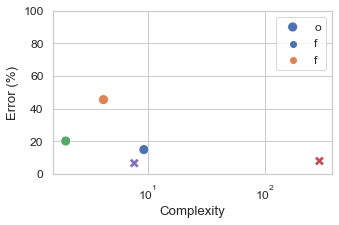

In [128]:
sns.set(font_scale=1.1)
sns.set_style("whitegrid")
plt.figure(figsize=[5, 3])
sns.scatterplot(data=df, x='Complexity', y='Error (%)', hue=df.index, style='OOB', s=100)
plt.xscale('log')
plt.ylim([0, 100])
plt.legend('off')
plt.show()

In [114]:
file.split('\\')[1]

'vdem_low2mid'

./results\mimic2\summary.csv


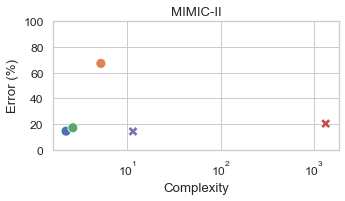

./results\mimic_explain_classifier\summary.csv


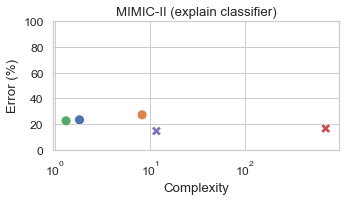

./results\vdem_low2mid\summary.csv


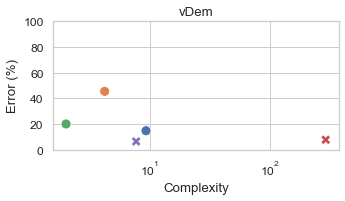

In [130]:
titles = ['MIMIC-II', 'MIMIC-II (explain classifier)', 'vDem']
for i, (file, title) in enumerate(zip(files, titles)):
    df = pd.read_csv(file, index_col=0)
    
    if file == './results\\vdem_low2mid\\summary.csv':
        df.rename(columns = {'model_accuracy_top_mean': 'model_accuracy_mean'}, inplace = True) 
        df.rename(columns = {'model_accuracy_top_sem': 'model_accuracy_sem'}, inplace = True) 
    print(file)
    df.iloc[:-1, 0] = df.iloc[:-1, 0] * 100
    df['explanation_accuracy_mean'] = df['explanation_accuracy_mean'] * 100
    df['Error (%)'] = 100 - df['explanation_accuracy_mean']
    df['Complexity'] = df['explanation_complexity_mean']
    df['OOB'] = [0, 0, 0, 1, 1]
    
    plt.figure(figsize=[5, 3])
    plt.title(title)
    sns.scatterplot(data=df, x='Complexity', y='Error (%)', hue=df.index, style='OOB', s=100, legend=False)
    plt.xscale('log')
    plt.ylim([0, 100])
    plt.tight_layout()
    name = file.split('\\')[1]
    plt.savefig(f"./results/{name}.png")
    plt.show()
    

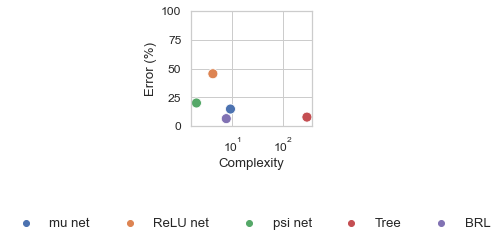

In [132]:
import matplotlib as mpl
df['Method'] = ['mu net', 'ReLU net', 'psi net', 'Tree', 'BRL']
plt.figure(figsize=[5, 8])
sns.scatterplot(data=df, x='Complexity', y='Error (%)', hue='Method', s=100)
plt.xscale('log')
plt.ylim([0, 100])
plt.legend(loc='lower center', fontsize='medium', ncol=5, frameon=False, 
           bbox_to_anchor=(0.5, -1),fancybox=False, shadow=False)
plt.tight_layout()
plt.savefig('./results/legend.png', bbox_inches=mpl.transforms.Bbox([[-0.8, 4.7], [5.9, 4.9]]))
plt.show()